In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, median_absolute_error

In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [3]:
data = pd.read_csv('./data/cleaned_car_data.csv', index_col=0)

In [4]:
data.sample()

,milage,accident,clean_title,price,horsepower,price_group,fuel_type_diesel,fuel_type_e85 flex fuel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_plug-in hybrid,transmission_category_automatic,transmission_category_manual
1975,0.134877,False,True,8500.0,-0.300056,1,False,True,False,False,False,False,False,True,False


In [5]:
features = data.drop(["price"], axis=1)
target = data[["price"]]

In [6]:
X = features.values
y = target.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'MedAE': 'neg_median_absolute_error'
}

In [9]:
modelNames = ['Regresja Liniowa', 'Drzewo decyzyjne', 'Drzewo decyzyjne(3,5)', 'Drzewa decyzyjne(5,10)',
              'Las losowy', 'Las losowy(100,10)', 'Las losowy(30,none)', 'Regresja Ridge', 'Regresja Lasso',
              'SVM', 'SVM(linear, 0.1)', 'SVM(rbf, 2.0, scale)', 'Gradient Boosting Regressor',
              'Gradient Boosting Regressor(100,0.01)', 'Gradient Boosting Regressor(200,0.1)',
              'AdaBoost', 'AdaBoost(50, 1.0)', 'AdaBoost(100, 0.5)', 'Bagging(50)', 'Bagging(10)', 'Bagging(150)',
              'Stacking(lr+svr+rf)', 'Stacking(rf+svr)', 'Stacking(gb+dt)', 'Stacking(rf+br)']


In [10]:
models = {
    modelNames[0]: LinearRegression(),
    modelNames[1]: DecisionTreeRegressor(random_state=42),
    modelNames[2]: DecisionTreeRegressor(max_depth=3, min_samples_leaf=5),
    modelNames[3]: DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    modelNames[4]: RandomForestRegressor(random_state=42),
    modelNames[5]: RandomForestRegressor(n_estimators=100, max_depth=10),
    modelNames[6]: RandomForestRegressor(n_estimators=50, max_depth=None),
    modelNames[7]: Ridge(),
    modelNames[8]: Lasso(),
    modelNames[9]: LinearSVR(random_state=42, dual='auto', max_iter=10000),
    modelNames[10]: LinearSVR(random_state=42, dual='auto', max_iter=10000, C=0.1),
    modelNames[11]: SVR(kernel='rbf', C=2.0, gamma='scale'),
    modelNames[12]: GradientBoostingRegressor(random_state=42),
    modelNames[13]: GradientBoostingRegressor(n_estimators=100, learning_rate=0.01),
    modelNames[14]: GradientBoostingRegressor(n_estimators=200, learning_rate=0.1),
    modelNames[15]: AdaBoostRegressor(random_state=42, n_estimators=50),
    modelNames[16]: AdaBoostRegressor(n_estimators=50, learning_rate=1.0),
    modelNames[17]: AdaBoostRegressor(n_estimators=100, learning_rate=0.5),
    modelNames[18]: BaggingRegressor(random_state=42, n_estimators=50),
    modelNames[19]: BaggingRegressor(n_estimators=10),
    modelNames[20]: BaggingRegressor(n_estimators=150),
    modelNames[21]: StackingRegressor(estimators=[
                                                     ('lr', LinearRegression()),
                                                     ('svr', LinearSVR(random_state=42, dual='auto')),
                                                     ('rf', RandomForestRegressor(random_state=42))
                                                 ], final_estimator=Ridge()),
    modelNames[22]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(n_estimators=10)),
                                                     ('svr', LinearSVR(random_state=42, dual='auto'))
                                                 ], final_estimator=Ridge()),
    modelNames[23]: StackingRegressor(estimators=[
                                                     ('gb', GradientBoostingRegressor(n_estimators=50)),
                                                     ('dt', DecisionTreeRegressor(max_depth=5))
                                                 ], final_estimator=Ridge()),
    modelNames[24]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(random_state=42)),
                                                     ('br', BaggingRegressor(n_estimators=150))
                                                 ], final_estimator=Ridge())
}

In [11]:
results = {}
normResultsMAE=[]
normResultsMSE=[]
normResultsMedAE=[]
timeResults=[]

for index, element in enumerate(modelNames):
    start_time = time.time()
    results[element] = cross_validate(models[element], X_train, y_train, cv=kf, scoring=scoring, return_train_score=False)
    end_time = time.time()
    timeResults.append(end_time - start_time)
    normResultsMAE.append(-np.mean(results[element]['test_MAE']))
    normResultsMSE.append(-np.mean(results[element]['test_MSE']))
    normResultsMedAE.append(-np.mean(results[element]['test_MedAE']))
    print(f"{element}: {normResultsMAE[-1]:.2f}, {normResultsMSE[-1]:.2f}, {normResultsMedAE[-1]:.2f}, {timeResults[-1]:.2f}")

Regresja Liniowa: 12241.48, 548455919.12, 8457.00, 0.06
Drzewo decyzyjne: 12595.21, 703789435.98, 7514.00, 0.08
Drzewo decyzyjne(3,5): 12664.88, 547508901.09, 8337.43, 0.04
Drzewa decyzyjne(5,10): 11695.63, 595701148.47, 7183.40, 0.04
Las losowy: 9911.93, 424992667.02, 5860.56, 2.99
Las losowy(100,10): 9876.05, 427380518.12, 5835.11, 1.99
Las losowy(30,none): 10064.65, 445804743.14, 5906.50, 1.45
Regresja Ridge: 12234.30, 548432902.69, 8448.59, 0.05
Regresja Lasso: 12240.06, 548446356.01, 8452.97, 0.23
SVM: 26191.91, 1613475513.25, 19385.66, 0.05
SVM(linear, 0.1): 34565.24, 2182949840.39, 28228.61, 0.04
SVM(rbf, 2.0, scale): 19027.78, 1013259869.83, 14011.60, 1.52
Gradient Boosting Regressor: 10106.31, 445712481.37, 5941.63, 0.89
Gradient Boosting Regressor(100,0.01): 12916.33, 559057485.17, 9831.03, 0.90
Gradient Boosting Regressor(200,0.1): 9933.15, 478862010.50, 5738.83, 1.74
AdaBoost: 17295.06, 730859852.31, 13594.76, 0.73
AdaBoost(50, 1.0): 16391.18, 676533640.95, 12967.21, 0.63
A

In [12]:
resultsMAE = pd.DataFrame({'Model': modelNames,'MAE': normResultsMAE})
resultsMSE = pd.DataFrame({'Model': modelNames, 'MSE': normResultsMSE})
resultsMedAE = pd.DataFrame({'Model': modelNames,'MedAE': normResultsMedAE})
resultsTime = pd.DataFrame({'Model': modelNames,'Time': timeResults})

print(resultsMAE.sort_values(by='MAE'),end="\n\n")
print(resultsMSE.sort_values(by='MSE'),end="\n\n")
print(resultsMedAE.sort_values(by='MedAE'),end="\n\n")
print(resultsTime.sort_values(by='Time'),end="\n\n")

                                    Model           MAE
24                        Stacking(rf+br)   9872.035920
5                      Las losowy(100,10)   9876.046599
4                              Las losowy   9911.933041
21                    Stacking(lr+svr+rf)   9917.688277
14   Gradient Boosting Regressor(200,0.1)   9933.148255
20                           Bagging(150)   9940.961977
18                            Bagging(50)   9957.439069
6                     Las losowy(30,none)  10064.649173
12            Gradient Boosting Regressor  10106.314963
23                        Stacking(gb+dt)  10250.053717
19                            Bagging(10)  10671.573466
22                       Stacking(rf+svr)  10886.105740
3                  Drzewa decyzyjne(5,10)  11695.634299
7                          Regresja Ridge  12234.295330
8                          Regresja Lasso  12240.060845
0                        Regresja Liniowa  12241.476446
1                        Drzewo decyzyjne  12595

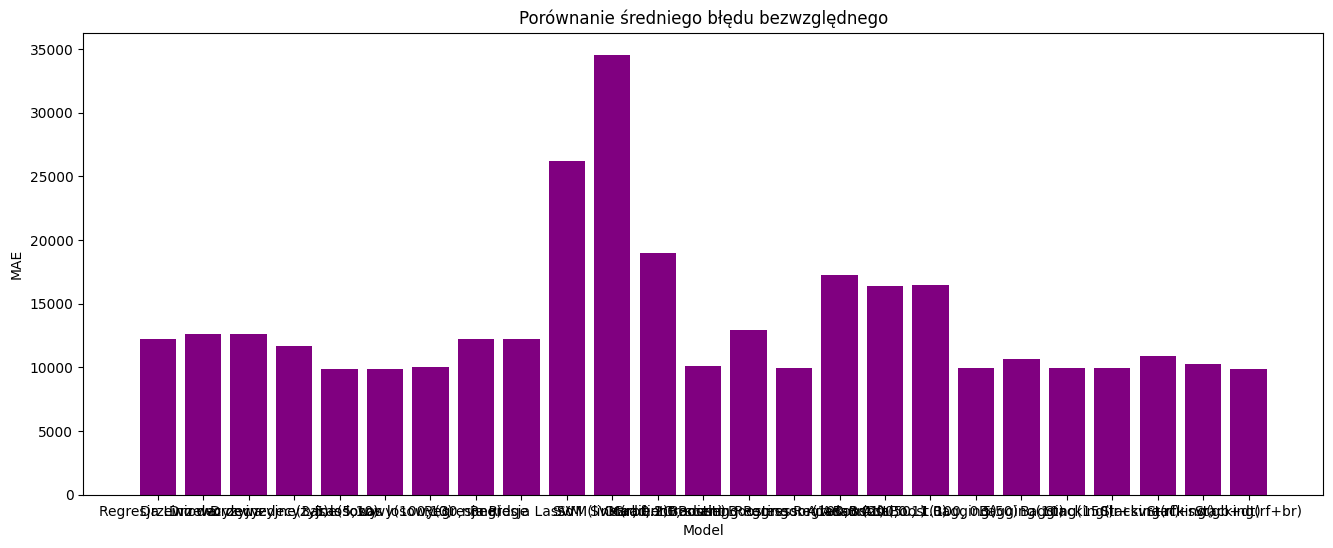

In [13]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMAE['Model'], resultsMAE['MAE'], color='purple')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Porównanie średniego błędu bezwzględnego')
plt.show()

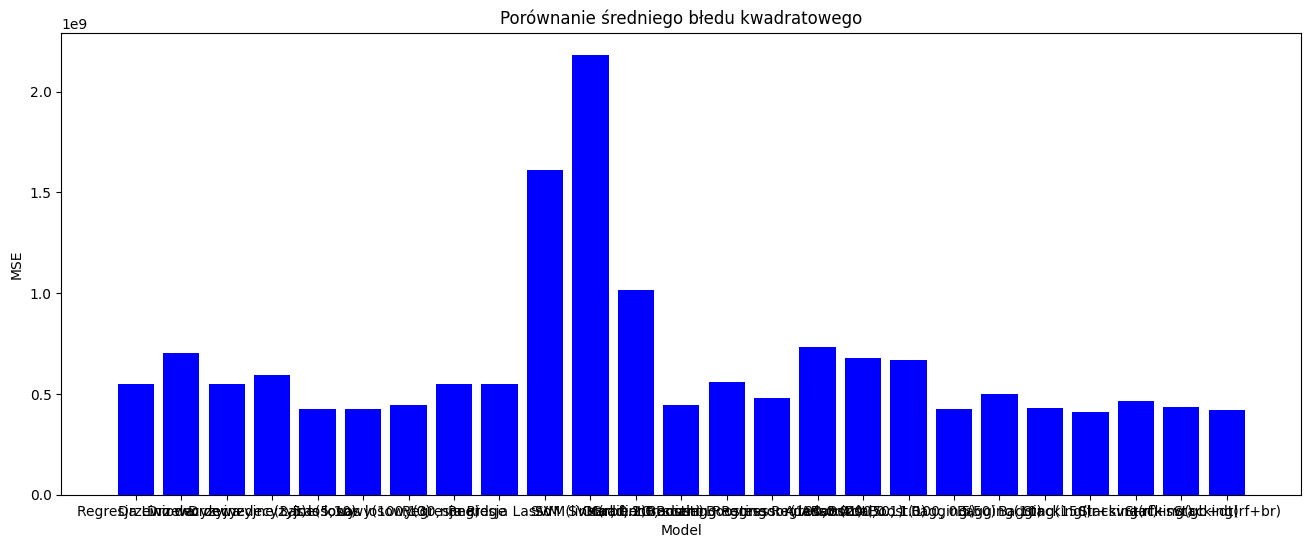

In [14]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMSE['Model'], resultsMSE['MSE'], color='blue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Porównanie średniego błedu kwadratowego')
plt.show()



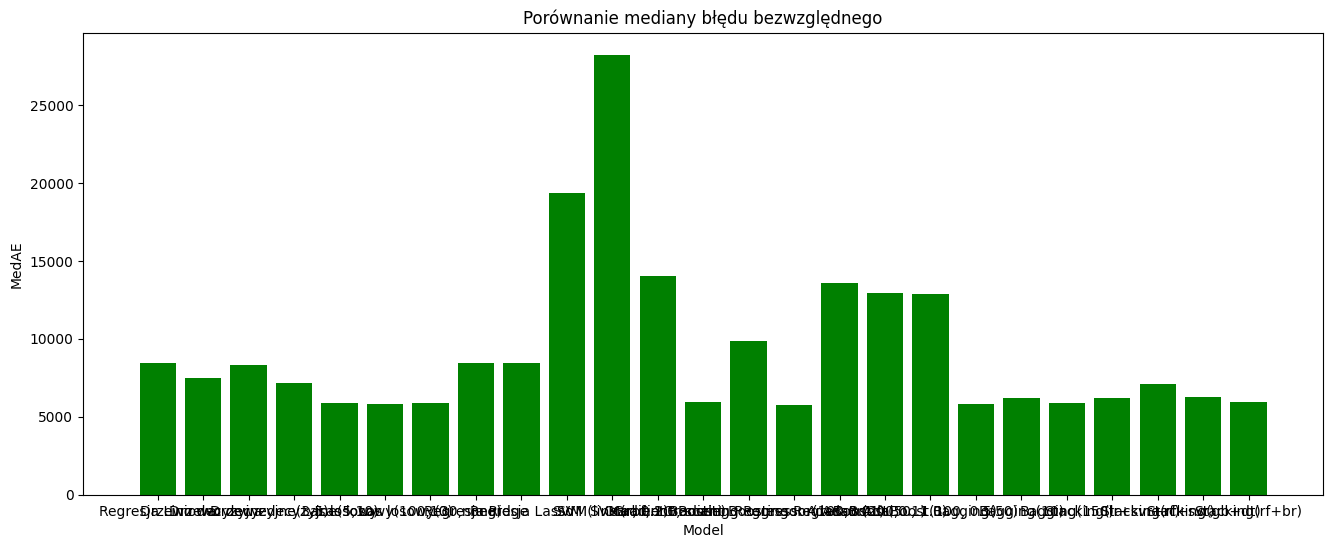

In [15]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMedAE['Model'], resultsMedAE['MedAE'], color='green')
plt.xlabel('Model')
plt.ylabel('MedAE')
plt.title('Porównanie mediany błędu bezwzględnego')
plt.show()



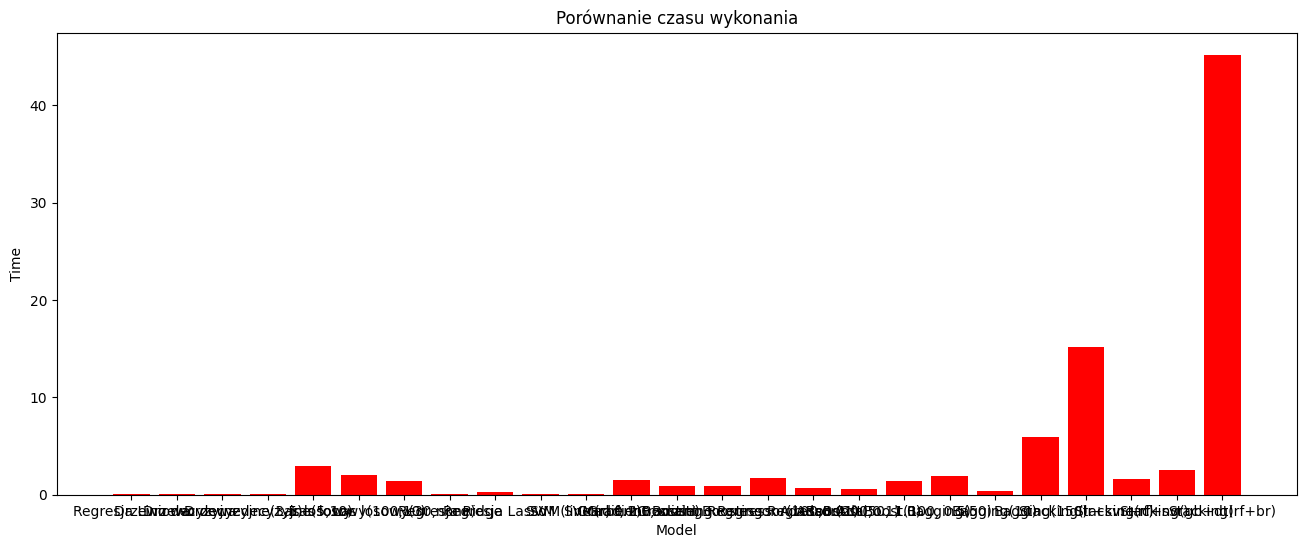

In [16]:
plt.figure(figsize=(16, 6))
plt.bar(resultsTime['Model'], resultsTime['Time'], color='red')
plt.xlabel('Model')
plt.ylabel('Time')
plt.title('Porównanie czasu wykonania')
plt.show()

In [22]:
model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_features': [0.5, 0.7, 0.9, 1.0],   
    'max_samples': [0.5, 0.7, 0.9, 1.0],      
    'bootstrap': [True, False],             
    'bootstrap_features': [True, False]       
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
absolute = median_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {absolute}")


/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.9, 'max_samples': 1.0, 'n_estimators': 300}
Mean Squared Error: 255598169.7982276
Mean Squared Error: 15987.43787472613
Mean Squared Error: 5668.340130507051
